# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy import stats

In [2]:
# Load the dataset
data = pd.read_csv("first inten project.csv")

In [3]:
data.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [4]:
len(data)

36285

In [5]:
data.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price ', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

In [6]:
# suumery statistics 
data.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [7]:
data.shape

(36285, 17)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

# 1. Data Preprocessing

In [9]:
# Check for null values 
print("Null values:\n", data.isnull().sum())

Null values:
 Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64


In [10]:
# Check for data types
print("Data types:\n", data.dtypes)

Data types:
 Booking_ID                   object
number of adults              int64
number of children            int64
number of weekend nights      int64
number of week nights         int64
type of meal                 object
car parking space             int64
room type                    object
lead time                     int64
market segment type          object
repeated                      int64
P-C                           int64
P-not-C                       int64
average price               float64
special requests              int64
date of reservation          object
booking status               object
dtype: object


In [11]:
# Remove any leading/trailing whitespaces in column names and string data
data.columns = data.columns.str.strip()
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [12]:
# Handle missing values by filling with median (numeric) or mode (categorical)
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col].fillna(data[col].median(), inplace=True)
for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [13]:
# Drop irrelevant columns (Booking_ID, date of reservation)
data = data.drop(columns=['Booking_ID', 'date of reservation'])

# 2. Check and Handle Outliers using IQR

In [14]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [15]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    data = remove_outliers_iqr(data, col)

In [16]:
# 2.1 Check and Handle Outliers using Z-score
#def remove_outliers_zscore(df, threshold=3):
    #z_scores = np.abs(stats.zscore(df[numeric_cols]))
    #return df[(z_scores < threshold).all(axis=1)]

In [17]:
# Remove outliers using Z-score
#data = remove_outliers_zscore(data)

# 3. Feature Engineering (Feature Selection and Extraction)

In [18]:
# Compute correlation matrix to select important features
corr_matrix = data[numeric_cols].corr()
print("Correlation Matrix:\n", corr_matrix)

Correlation Matrix:
                           number of adults  number of children  \
number of adults                       NaN                 NaN   
number of children                     NaN                 NaN   
number of weekend nights               NaN                 NaN   
number of week nights                  NaN                 NaN   
car parking space                      NaN                 NaN   
lead time                              NaN                 NaN   
repeated                               NaN                 NaN   
P-C                                    NaN                 NaN   
P-not-C                                NaN                 NaN   
average price                          NaN                 NaN   
special requests                       NaN                 NaN   

                          number of weekend nights  number of week nights  \
number of adults                               NaN                    NaN   
number of children              

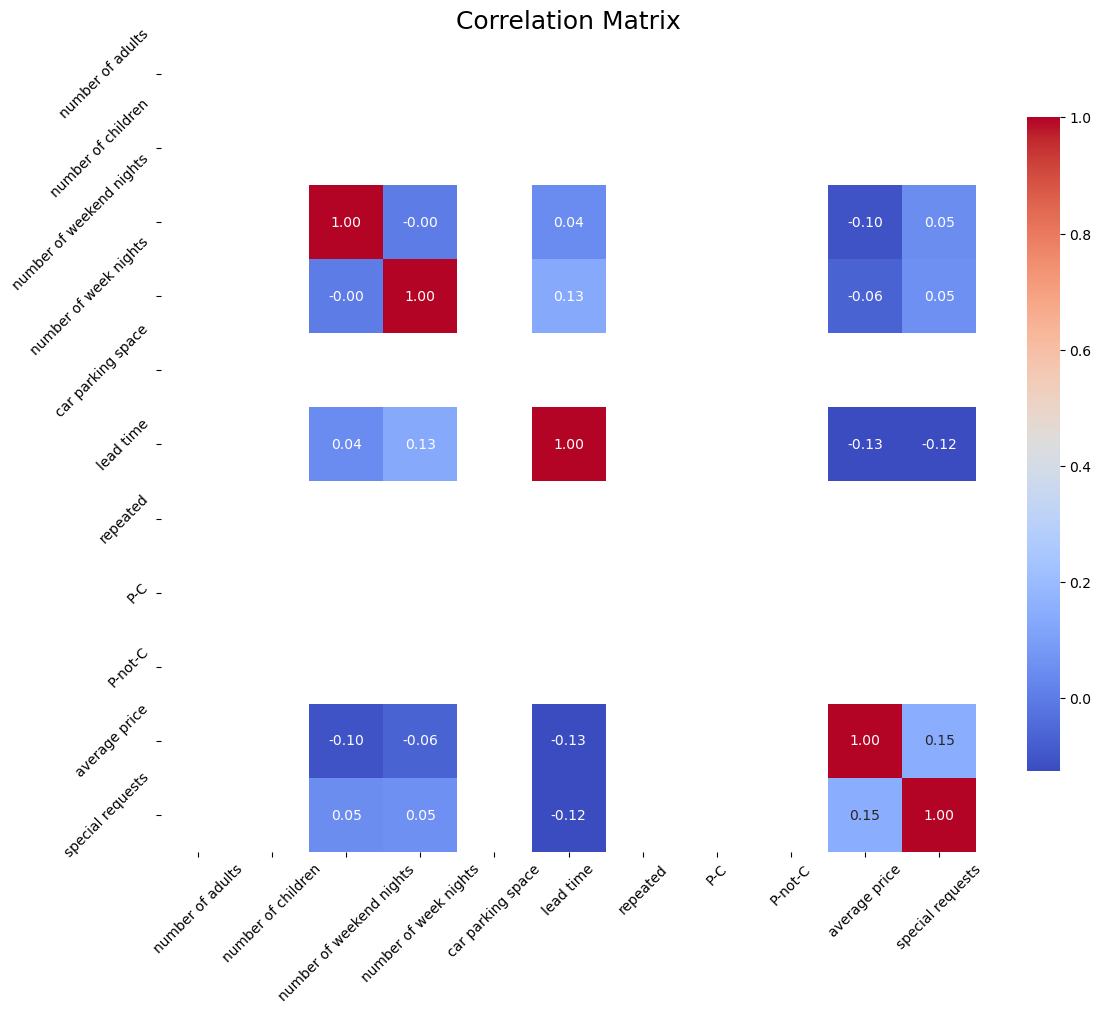

In [19]:
# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix', fontsize=18)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
# Drop features with low correlation with the target or multicollinearity
# (This step depends on correlation analysis, modify based on results)
# Example: data = data.drop(columns=['some_low_correlation_feature'])

# 4. Transformation for Categorical Data

In [21]:
# Convert categorical columns to numerical values using Label Encoding
le = LabelEncoder()
categorical_cols = ['type of meal', 'room type', 'market segment type']
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

In [22]:
# Ensure the target (booking status) is also encoded
data['booking status'] = le.fit_transform(data['booking status'])

In [23]:
# 5. Train-Test Split
# Split the dataset into features(X) and target(y)
X = data.drop(columns=['booking status'])
y = data['booking status']

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# 6. Standardization of Numeric Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 7. Modeling and Accuracy Calculation

In [26]:
# 7.1 K-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
knn_pred = knn_classifier.predict(X_test)

In [27]:
knn_accuracy = accuracy_score(y_test, knn_pred)
print(f"KNN Accuracy: {knn_accuracy}")
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, knn_pred))
print("KNN Classification Report:\n", classification_report(y_test, knn_pred))

KNN Accuracy: 0.8357715903728173
KNN Confusion Matrix:
 [[1088  402]
 [ 294 2454]]
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.73      0.76      1490
           1       0.86      0.89      0.88      2748

    accuracy                           0.84      4238
   macro avg       0.82      0.81      0.82      4238
weighted avg       0.83      0.84      0.83      4238



In [28]:
# 7.2 Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)

In [29]:
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy}")
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.8721094856064181
Random Forest Confusion Matrix:
 [[1160  330]
 [ 212 2536]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.78      0.81      1490
           1       0.88      0.92      0.90      2748

    accuracy                           0.87      4238
   macro avg       0.87      0.85      0.86      4238
weighted avg       0.87      0.87      0.87      4238

